In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score, mean_squared_error

In [5]:
import re

In [6]:
cars_data = pd.read_csv('Cardetails.csv')

In [7]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
cars_data.drop(columns=['torque'], inplace=True)

In [9]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [10]:
cars_data.shape

(8128, 12)

In [11]:
#preprocessing

In [12]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [13]:
def convert_float(bhp_string):
    if isinstance(bhp_string, str):
        match = re.search(r'\d+', bhp_string)
        if match:
            return float(match.group())
    return float('nan')

In [14]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [15]:
cars_data.dropna(inplace=True)

In [16]:
cars_data["max_power"] = cars_data["max_power"].apply(convert_float)

In [17]:
cars_data["mileage"] = cars_data["mileage"].apply(convert_float)

In [18]:
cars_data["engine"] = cars_data["engine"].apply(convert_float)

In [19]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7906 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 803.1+ KB


In [20]:
cars_data.shape

(7907, 12)

In [21]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0


In [22]:
cars_data.dropna(inplace=True) ##inplace=True means that the operation will modify the original DataFrame instead of returning a new one.

In [23]:
cars_data.shape

(7906, 12)

In [24]:
#Duplicate Check

In [25]:
cars_data.duplicated().sum()

1189

In [26]:
cars_data.drop_duplicates(inplace=True)

In [27]:
cars_data.shape

(6717, 12)

In [28]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.0,998.0,67.0,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.0,1396.0,88.0,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.0,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.0,5.0


In [29]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 682.2+ KB


In [30]:
cars_data.dropna(inplace=True)

In [31]:
cars_data.shape

(6717, 12)

In [32]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [33]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [34]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [35]:
get_brand_name('Hyundai i20 Magna')

'Hyundai'

In [36]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [37]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [38]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [39]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [40]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

In [41]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

In [42]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [43]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [44]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [45]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [46]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   int64  
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   int64  
 6   transmission   6717 non-null   int64  
 7   owner          6717 non-null   int64  
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.2+ KB


In [47]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [48]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

In [49]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   int64  
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   int64  
 5   seller_type    6717 non-null   int64  
 6   transmission   6717 non-null   int64  
 7   owner          6717 non-null   int64  
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 682.2 KB


In [50]:
cars_data.reset_index(inplace=True)

In [51]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,1,23.0,1248.0,74.0,5.0
1,1,2,2014,370000,120000,1,1,1,2,21.0,1498.0,103.0,5.0
2,2,3,2006,158000,140000,2,1,1,3,17.0,1497.0,78.0,5.0
3,3,4,2010,225000,127000,1,1,1,1,23.0,1396.0,90.0,5.0
4,4,1,2007,130000,120000,2,1,1,1,16.0,1298.0,88.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,8121,1,2013,260000,50000,2,1,1,2,18.0,998.0,67.0,5.0
6713,8122,4,2014,475000,80000,1,1,1,2,22.0,1396.0,88.0,5.0
6714,8123,4,2013,320000,110000,2,1,1,1,18.0,1197.0,82.0,5.0
6715,8124,4,2007,135000,119000,1,1,1,4,16.0,1493.0,110.0,5.0


In [52]:
cars_data.describe()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,6717.000000,6717.000000,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000
mean,3957.142177,5.350007,2013.611136,5.263860e+05,7.339834e+04,1.475808,1.107191,1.085604,1.500074,19.022331,1430.985857,87.462855,5.434271
std,2361.800637,4.611373,3.897402,5.235504e+05,5.870328e+04,0.552664,0.322111,0.279799,0.737740,4.068770,493.469198,31.697291,0.983805
min,0.000000,1.000000,1994.000000,2.999900e+04,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,624.000000,32.000000,2.000000
25%,1915.000000,1.000000,2011.000000,2.500000e+05,3.800000e+04,1.000000,1.000000,1.000000,1.000000,16.000000,1197.000000,67.000000,5.000000
50%,3869.000000,4.000000,2014.000000,4.200000e+05,6.820300e+04,1.000000,1.000000,1.000000,1.000000,19.000000,1248.000000,81.000000,5.000000
75%,5992.000000,8.000000,2017.000000,6.500000e+05,1.000000e+05,2.000000,1.000000,1.000000,2.000000,22.000000,1498.000000,100.000000,5.000000
max,8125.000000,31.000000,2020.000000,1.000000e+07,2.360457e+06,4.000000,3.000000,2.000000,5.000000,42.000000,3604.000000,400.000000,14.000000


In [53]:
cars_data['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [54]:
cars_data.drop(columns=['index'], inplace=True)

In [55]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

In [56]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [57]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

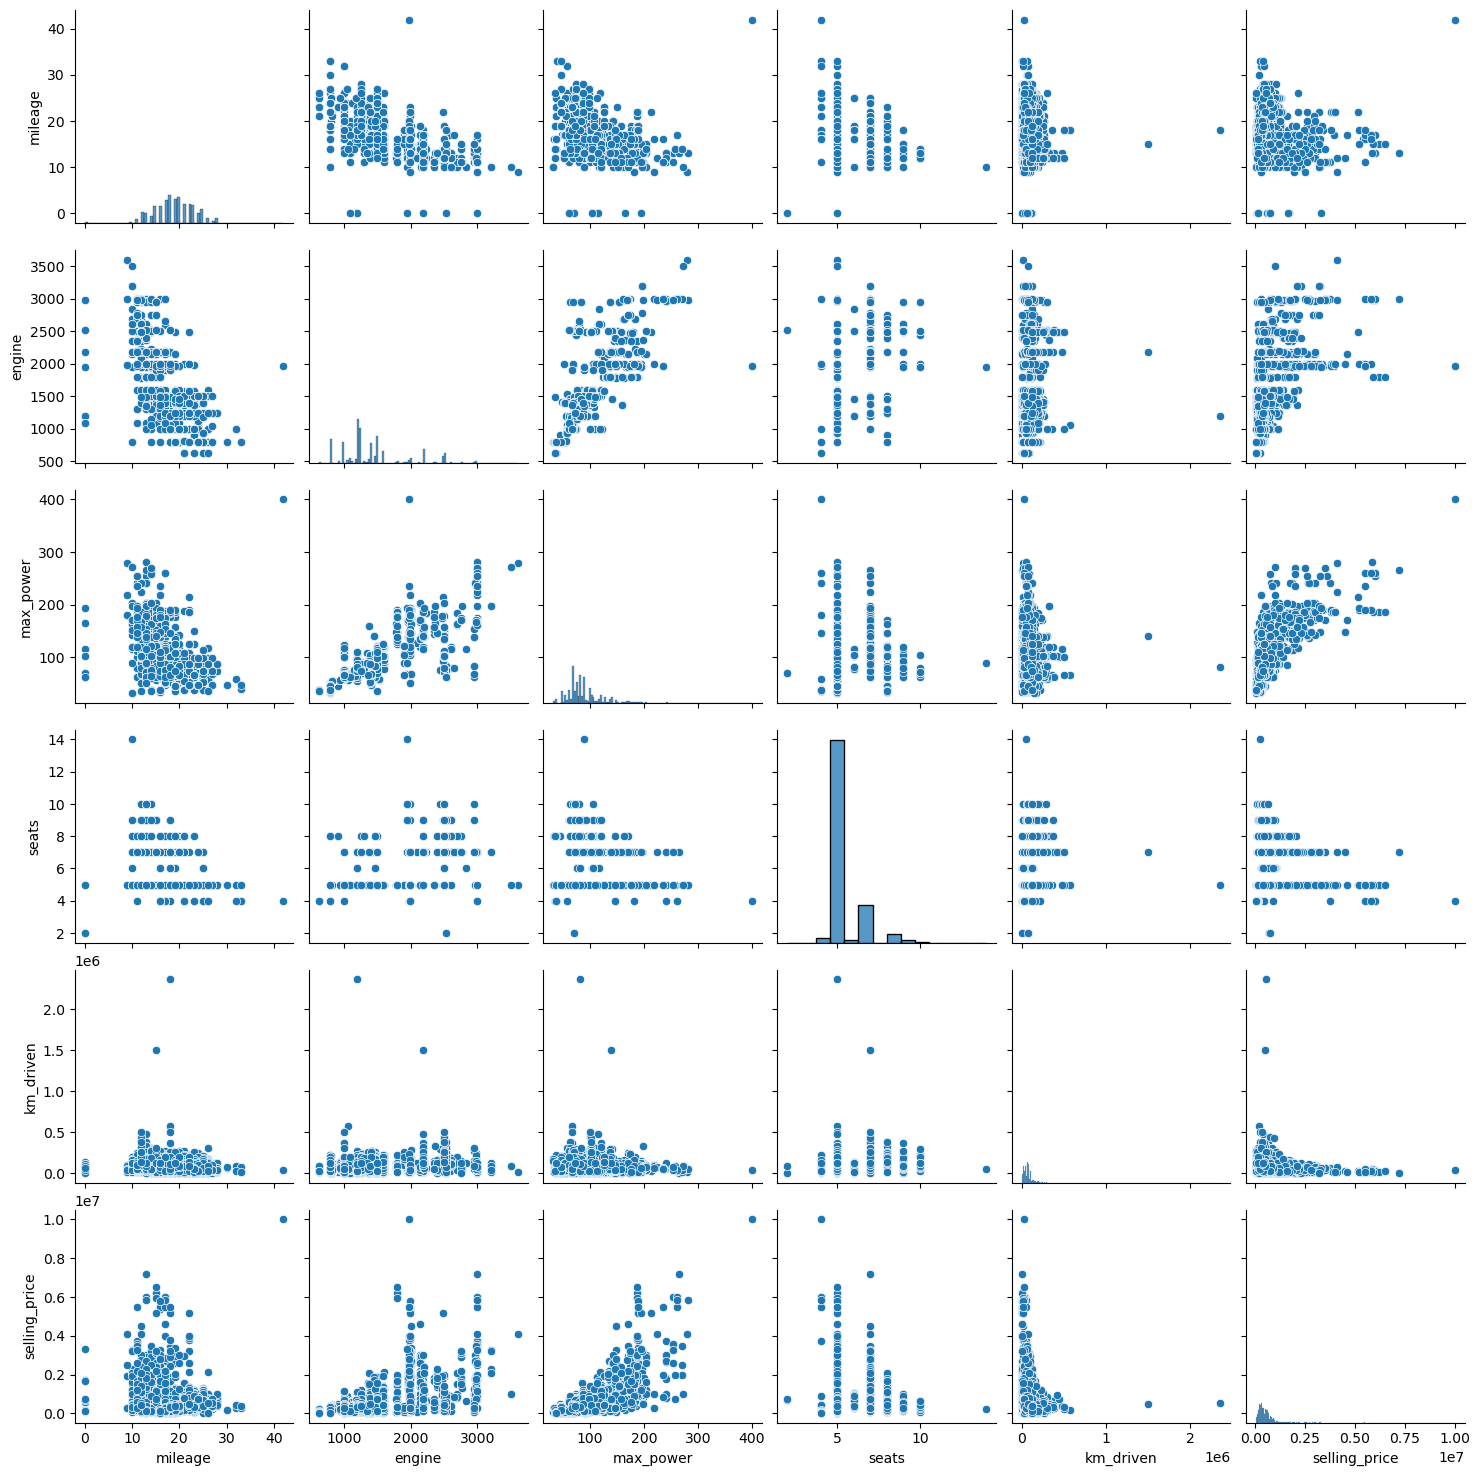

In [59]:
import seaborn as sns 
numericals = ["mileage", "engine", "max_power", "seats", "km_driven", "selling_price"]
sns.pairplot(cars_data, vars=numericals)
plt.show()

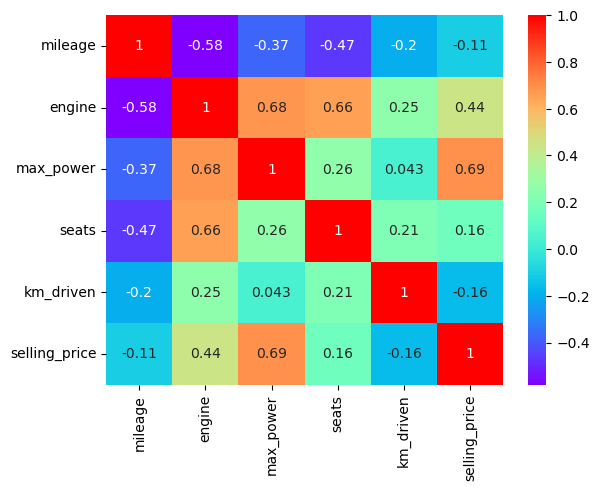

In [60]:
corr = cars_data[numericals].corr()
sns.heatmap(corr, annot=True, cmap="rainbow")
plt.show()

In [61]:
model = LinearRegression()

In [62]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   int64  
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   int64  
 5   seller_type    6717 non-null   int64  
 6   transmission   6717 non-null   int64  
 7   owner          6717 non-null   int64  
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 629.8 KB


In [63]:
model.fit(x_train, y_train)

LinearRegression()

In [64]:
predict = model.predict(x_test)

In [65]:
predict

array([ 183348.88060336,  213787.90128069,  475694.72398812, ...,
        582087.70582414, 1062548.64574642,  686304.84722275])

In [66]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2867,8,2014,120000,1,1,1,1,15.0,2179.0,140.0,7.0


In [67]:
input_data_model = pd.DataFrame(
    [[5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [68]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0


In [69]:
model.predict(input_data_model)

array([1003891.31197305])

In [70]:
import pickle as pk

In [71]:
pk.dump(model,open('model.pkl','wb'))

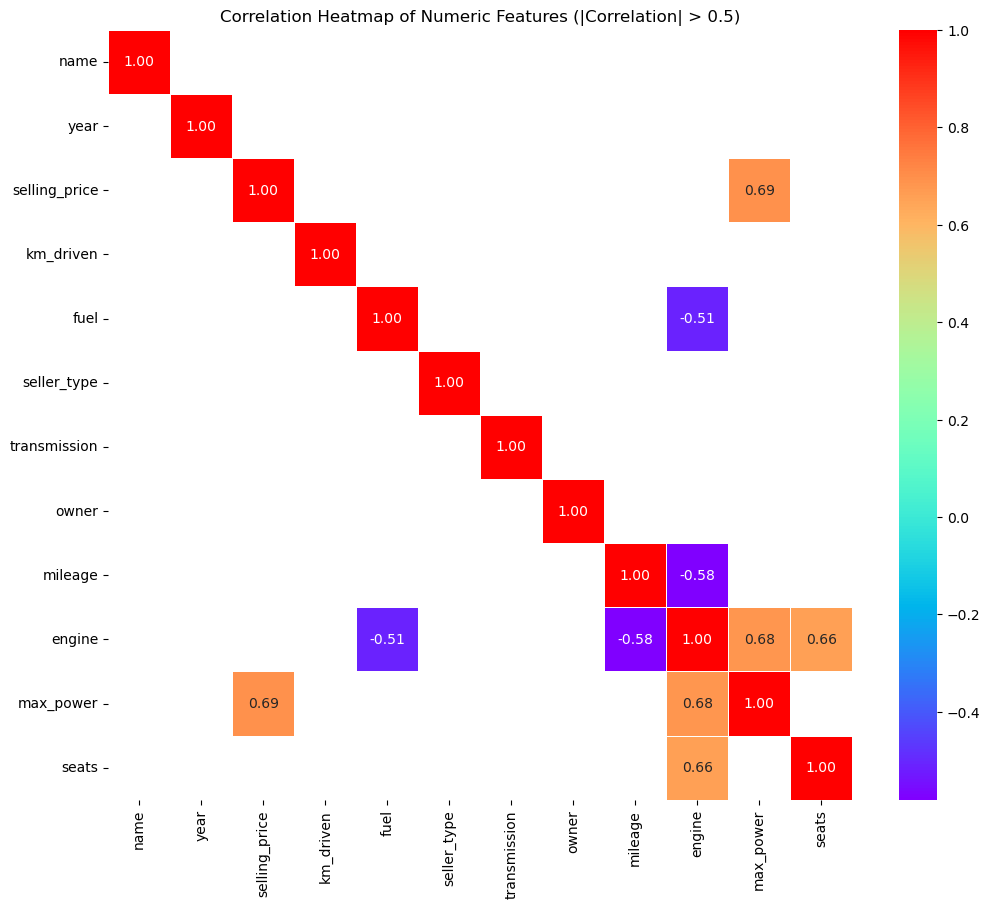

In [72]:
# Heatmap Plotting
# Select only numeric columns
numeric_columns = cars_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Filter correlation matrix to include values greater than 0.5 or less than -0.5
corr_matrix_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot the heatmap with filtered correlation values
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features (|Correlation| > 0.5)')
plt.show()


In [73]:
def plot(df, name, nums, axes):
    group = df.groupby(name)
    mean = group[nums].mean()
    sns.barplot(x=mean.index, y=mean, ax=axes)
    for container in axes.containers:
        axes.bar_label(container)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

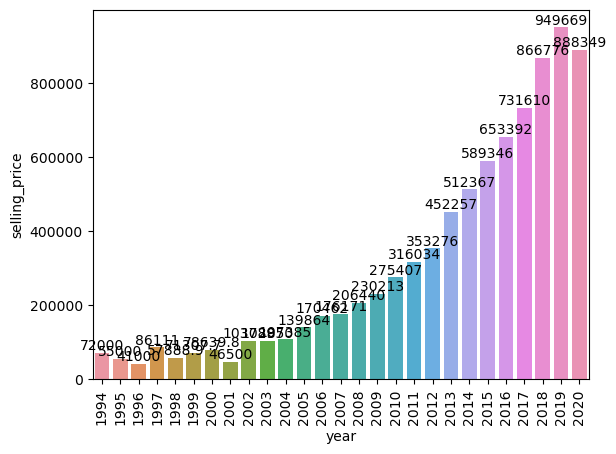

In [74]:
## mean selling price
fig, axes = plt.subplots()
plot(cars_data, "year", "selling_price", axes)
plt.show()

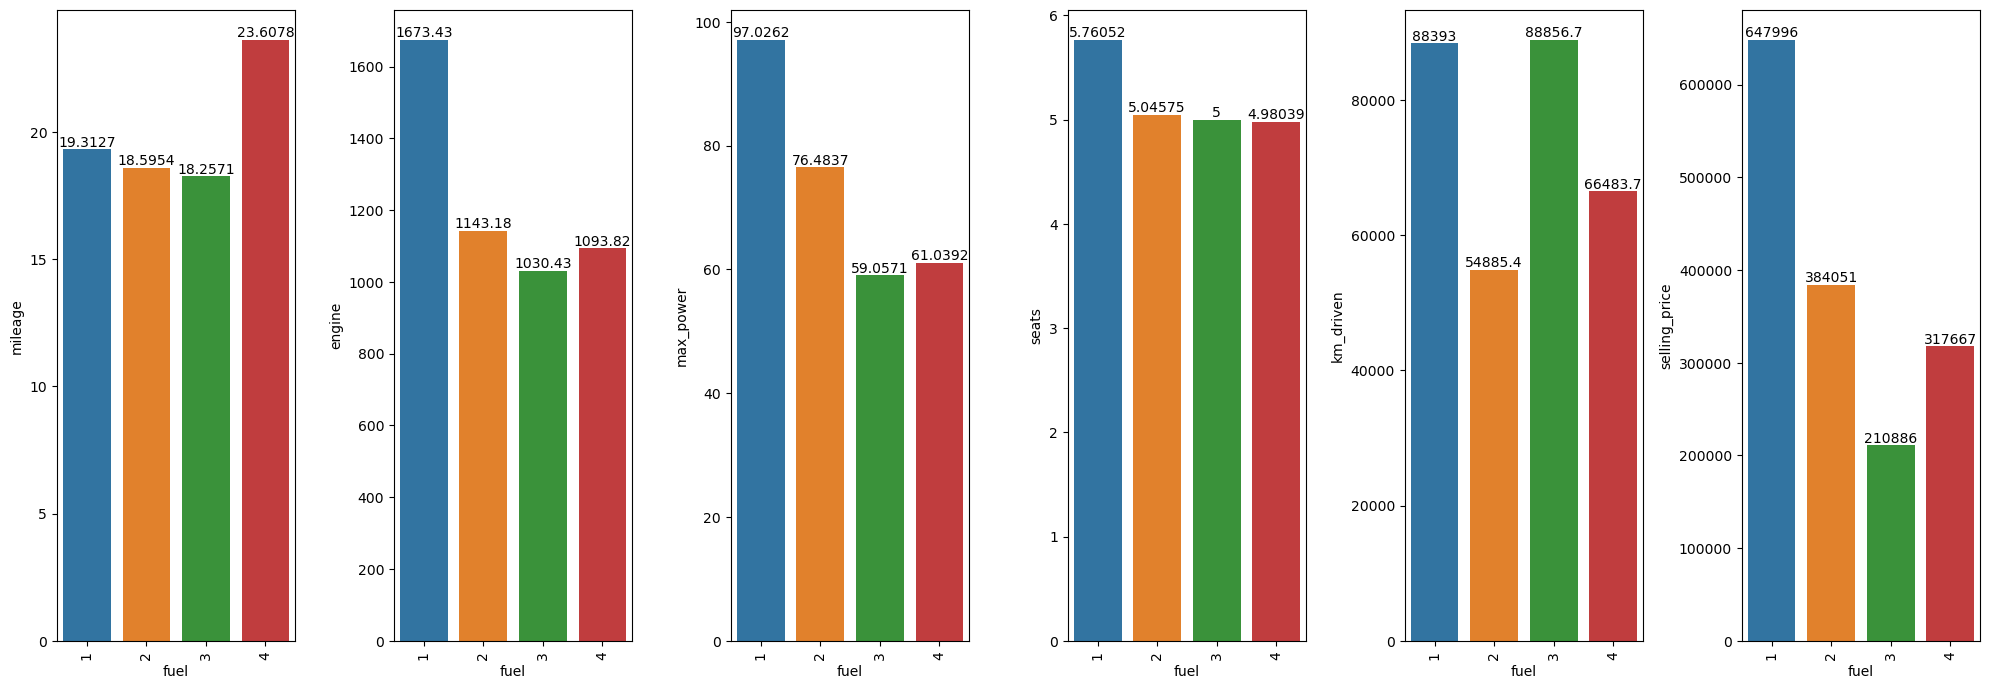

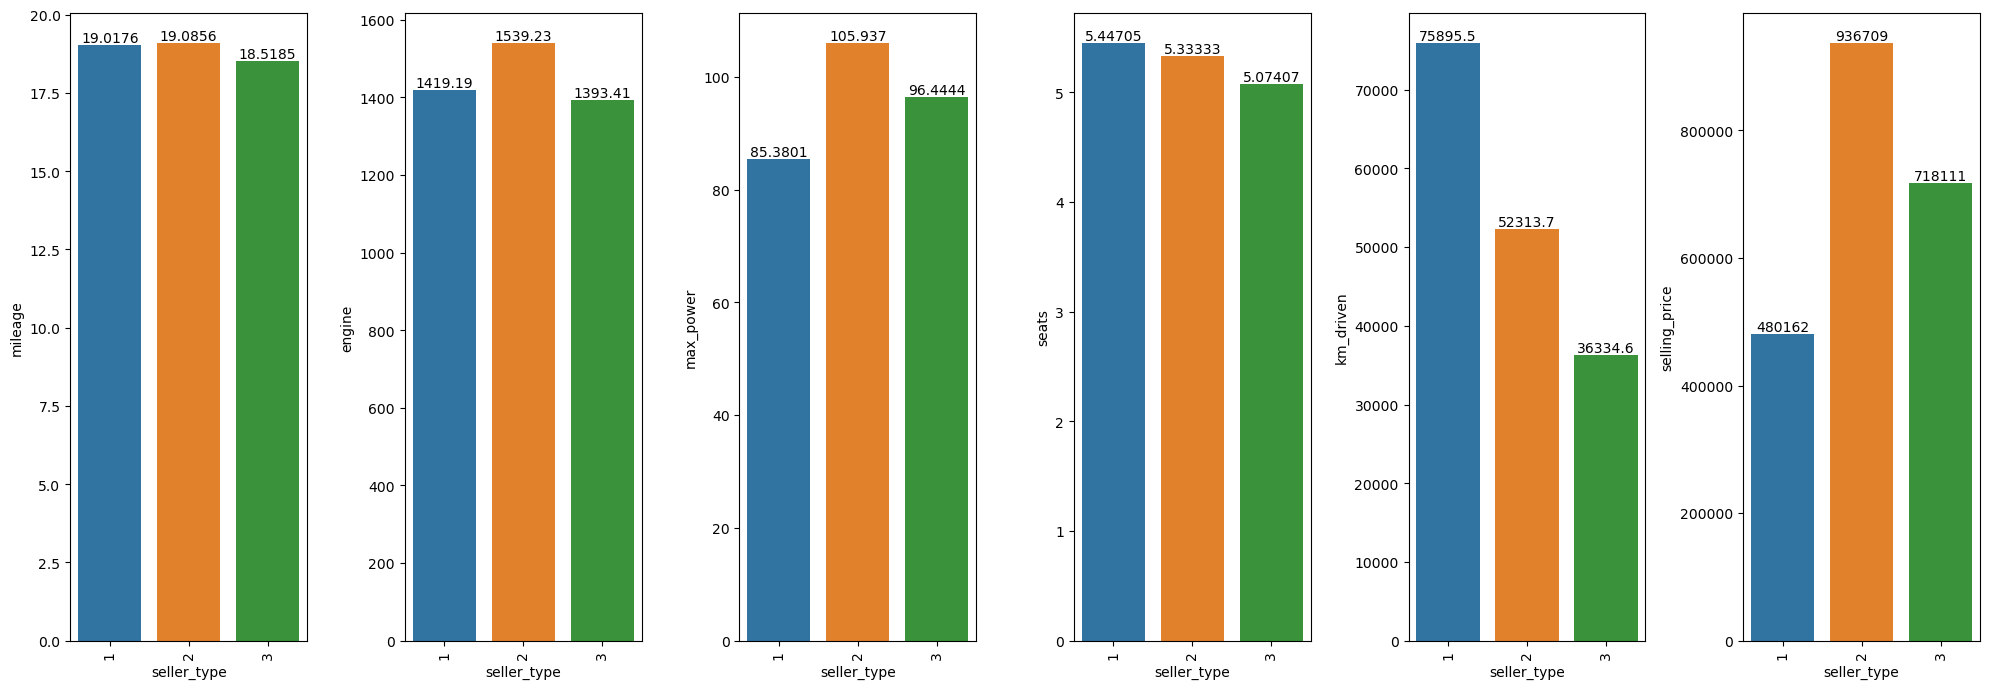

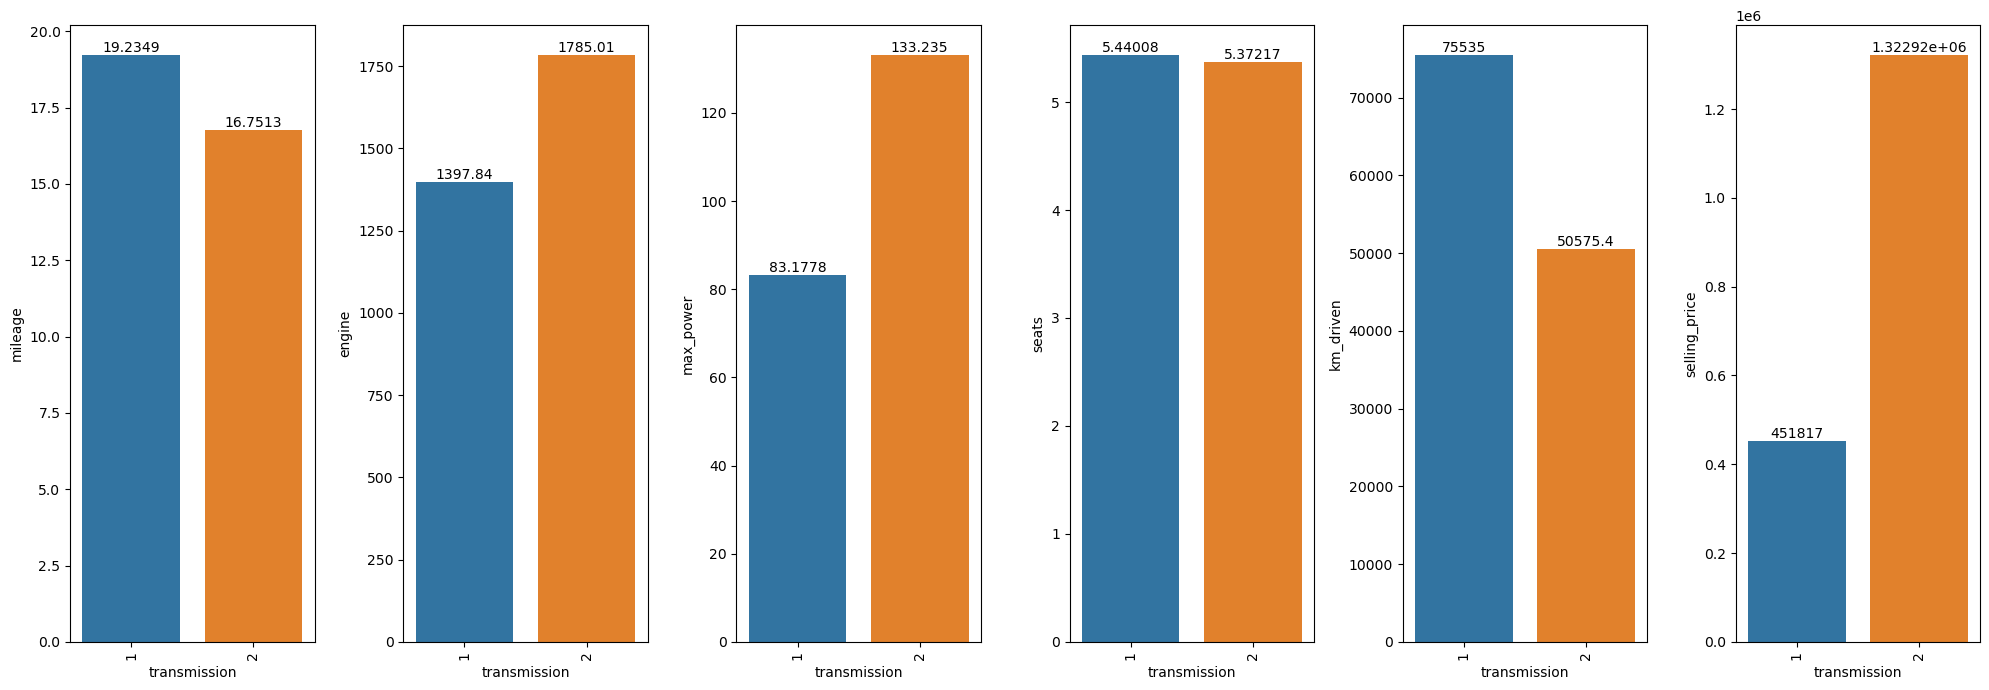

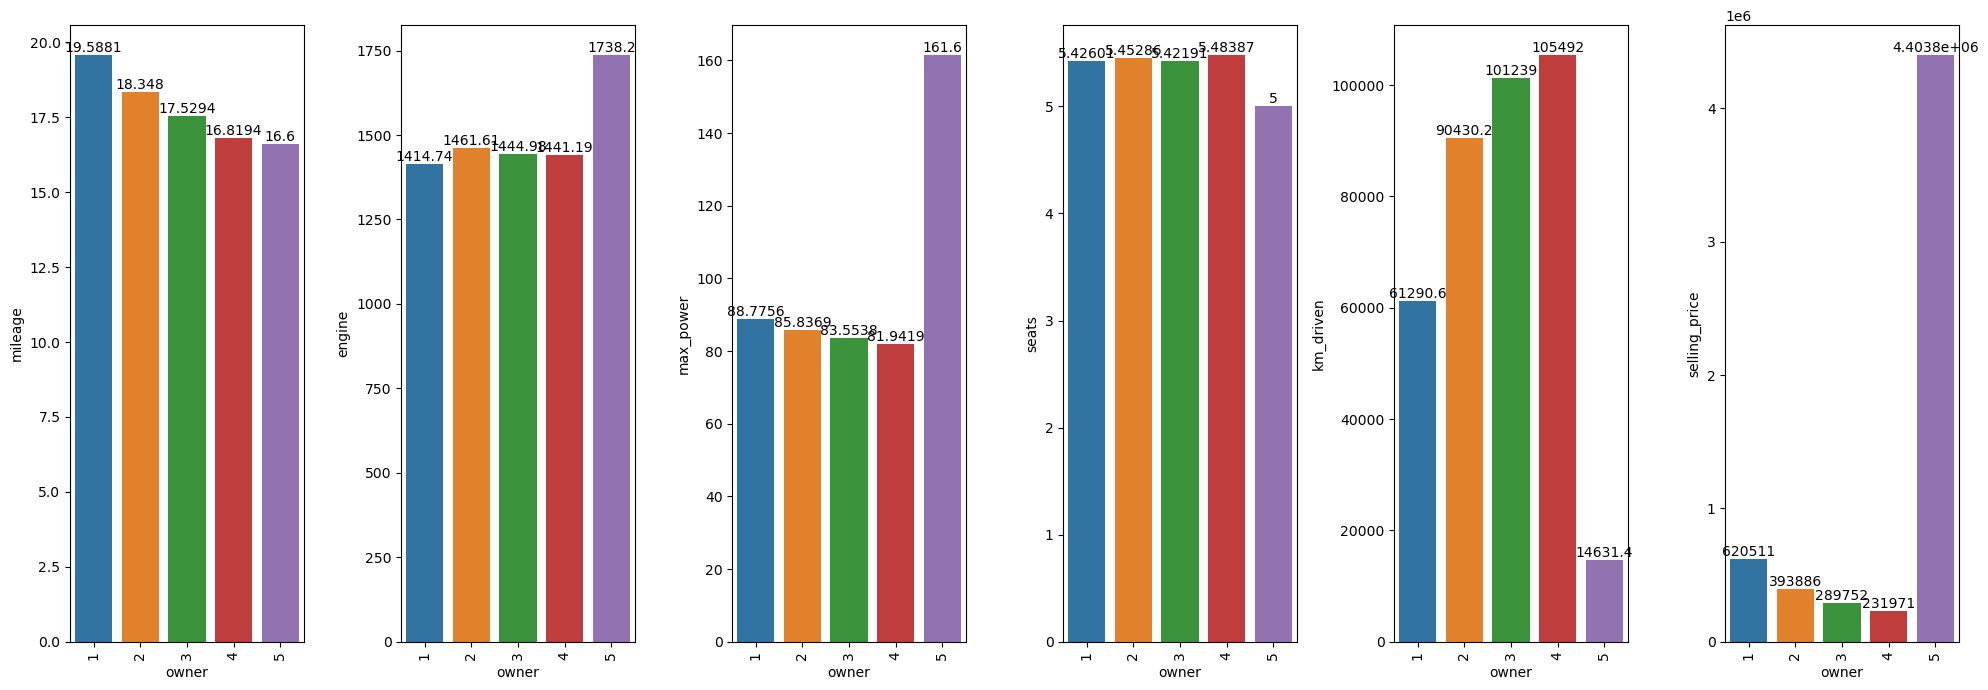

In [75]:
## mean for per category 
categoricals = [ "fuel", "seller_type", "transmission", "owner"]
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 7))
    for j, k in enumerate(numericals):
        plot(cars_data, i, k, axes[j])
    plt.tight_layout()
    plt.show()


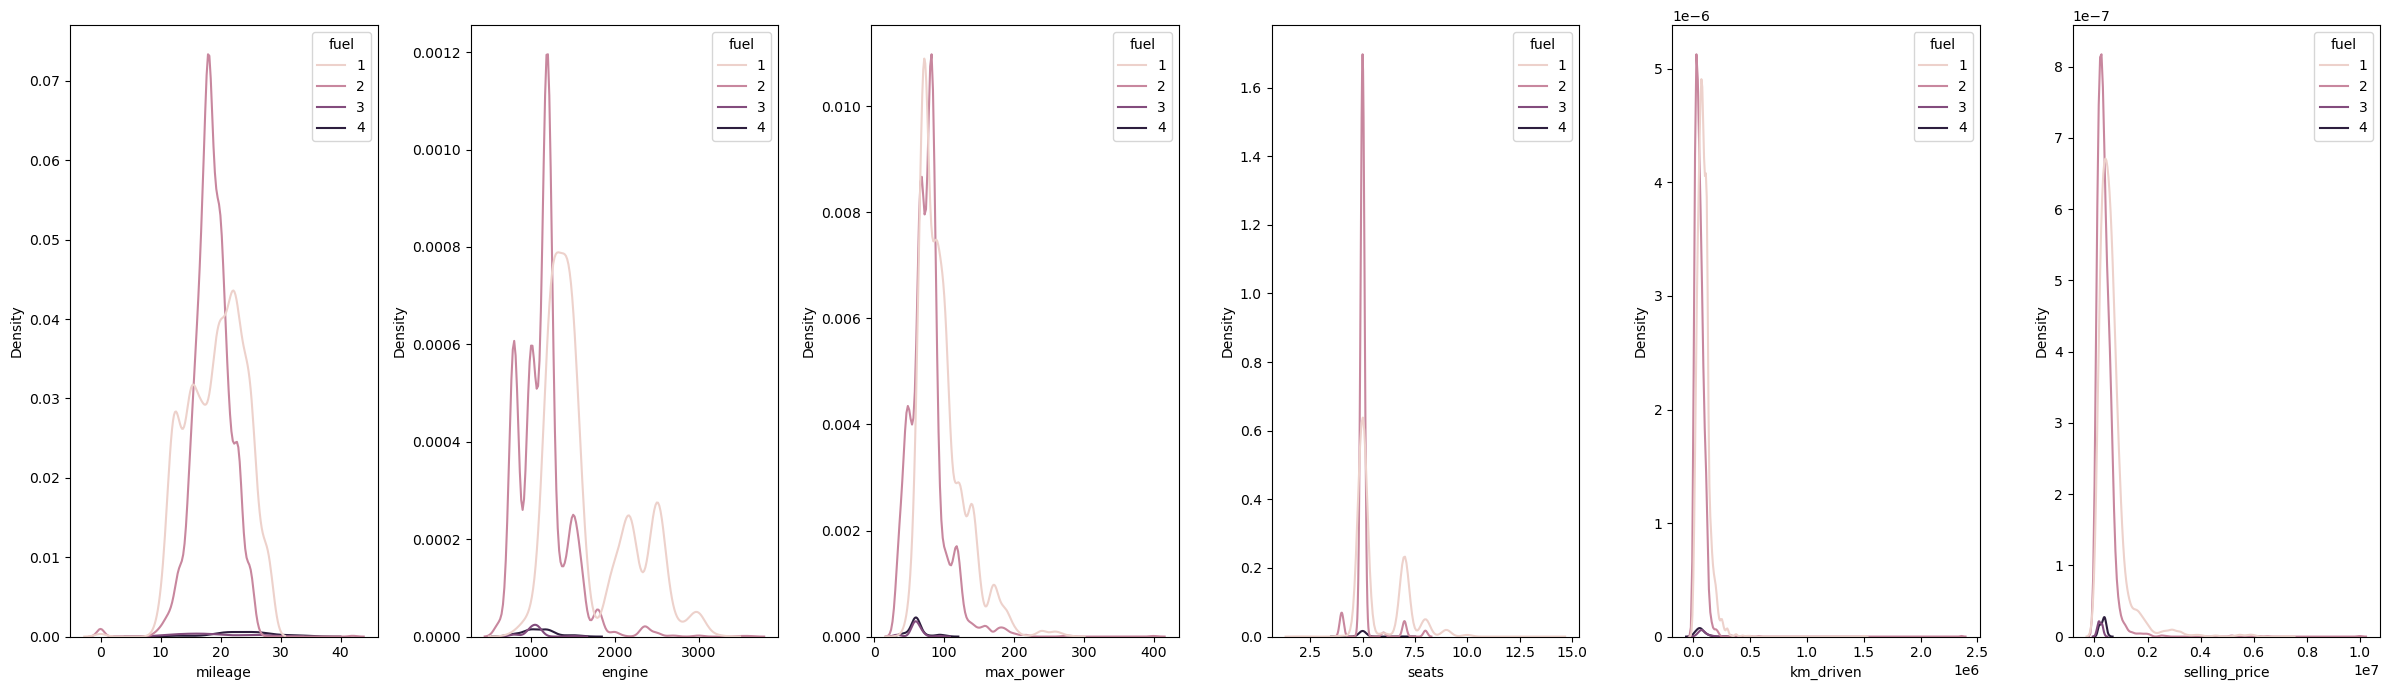

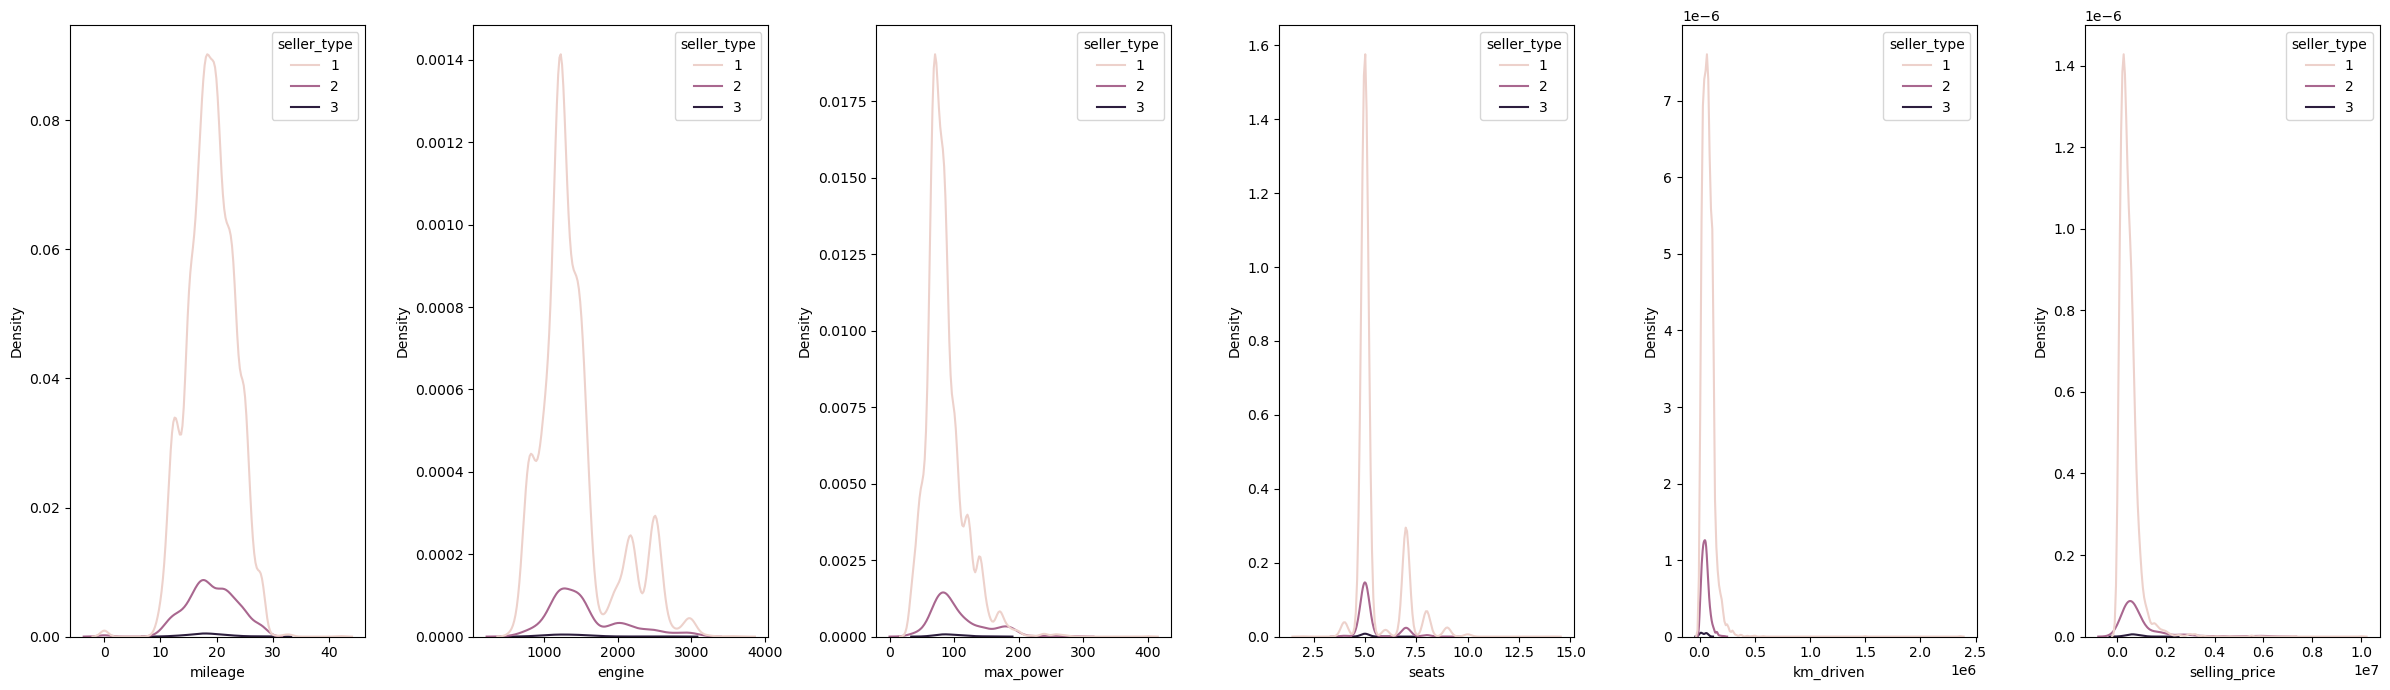

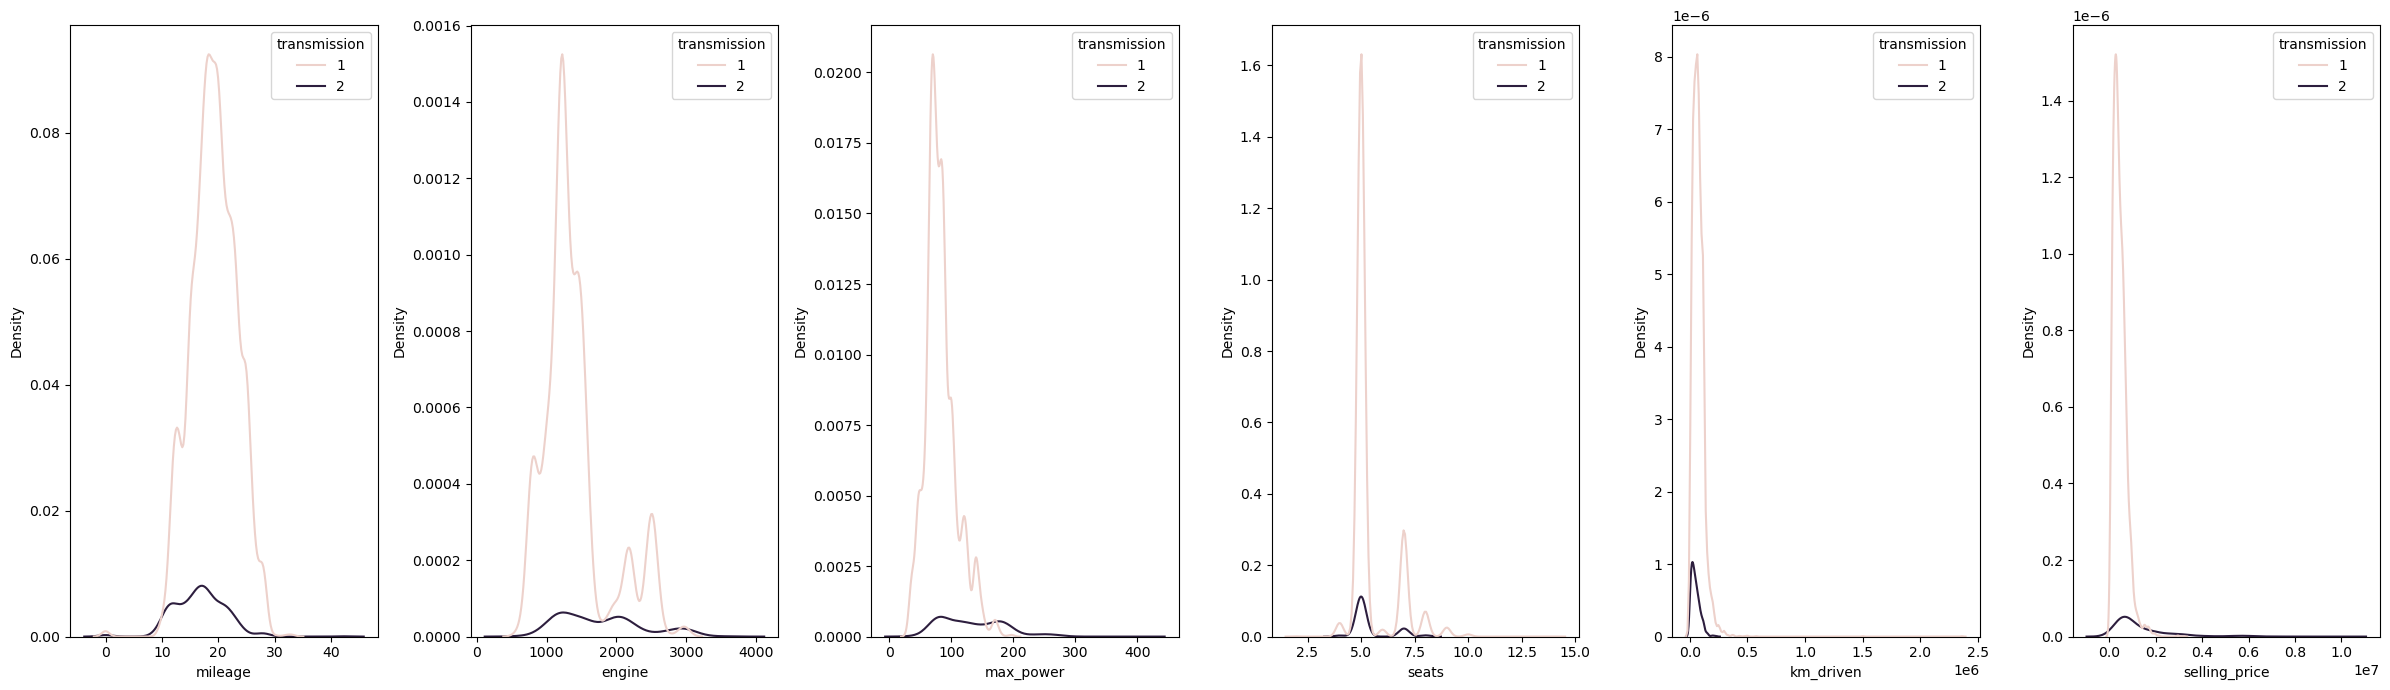

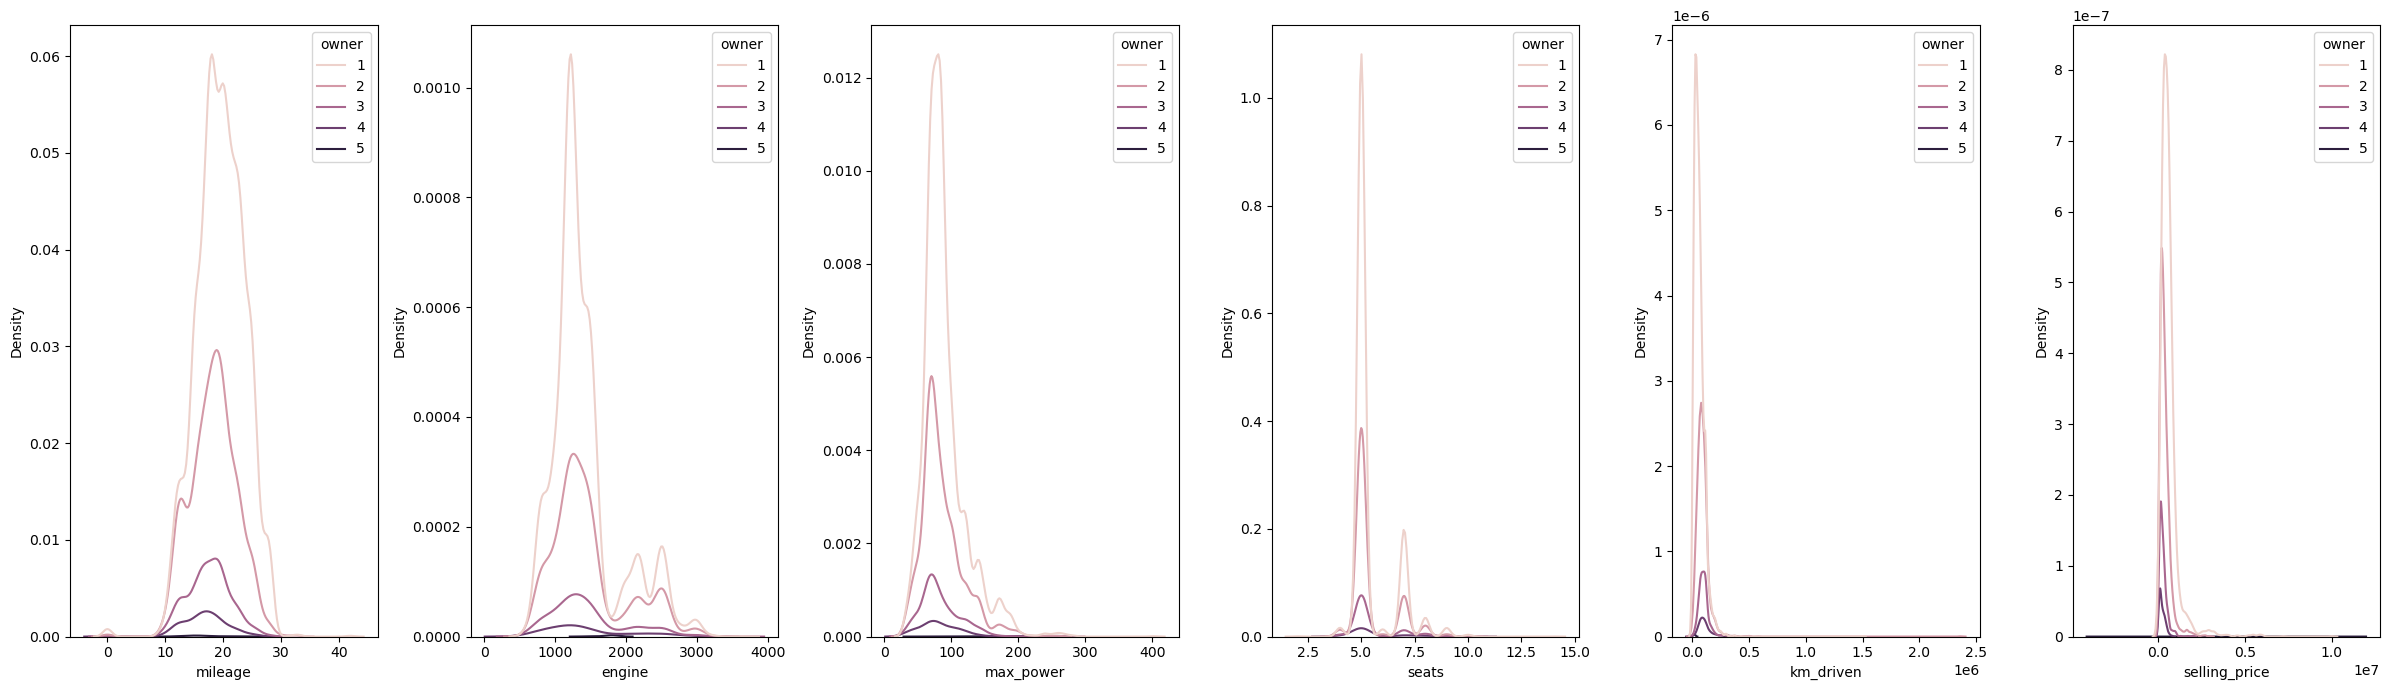

In [76]:
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24, 7))
    for j, k in enumerate(numericals):
        sns.kdeplot(cars_data, x=k, hue=i, ax=axes[j])
    plt.tight_layout()
    plt.show()

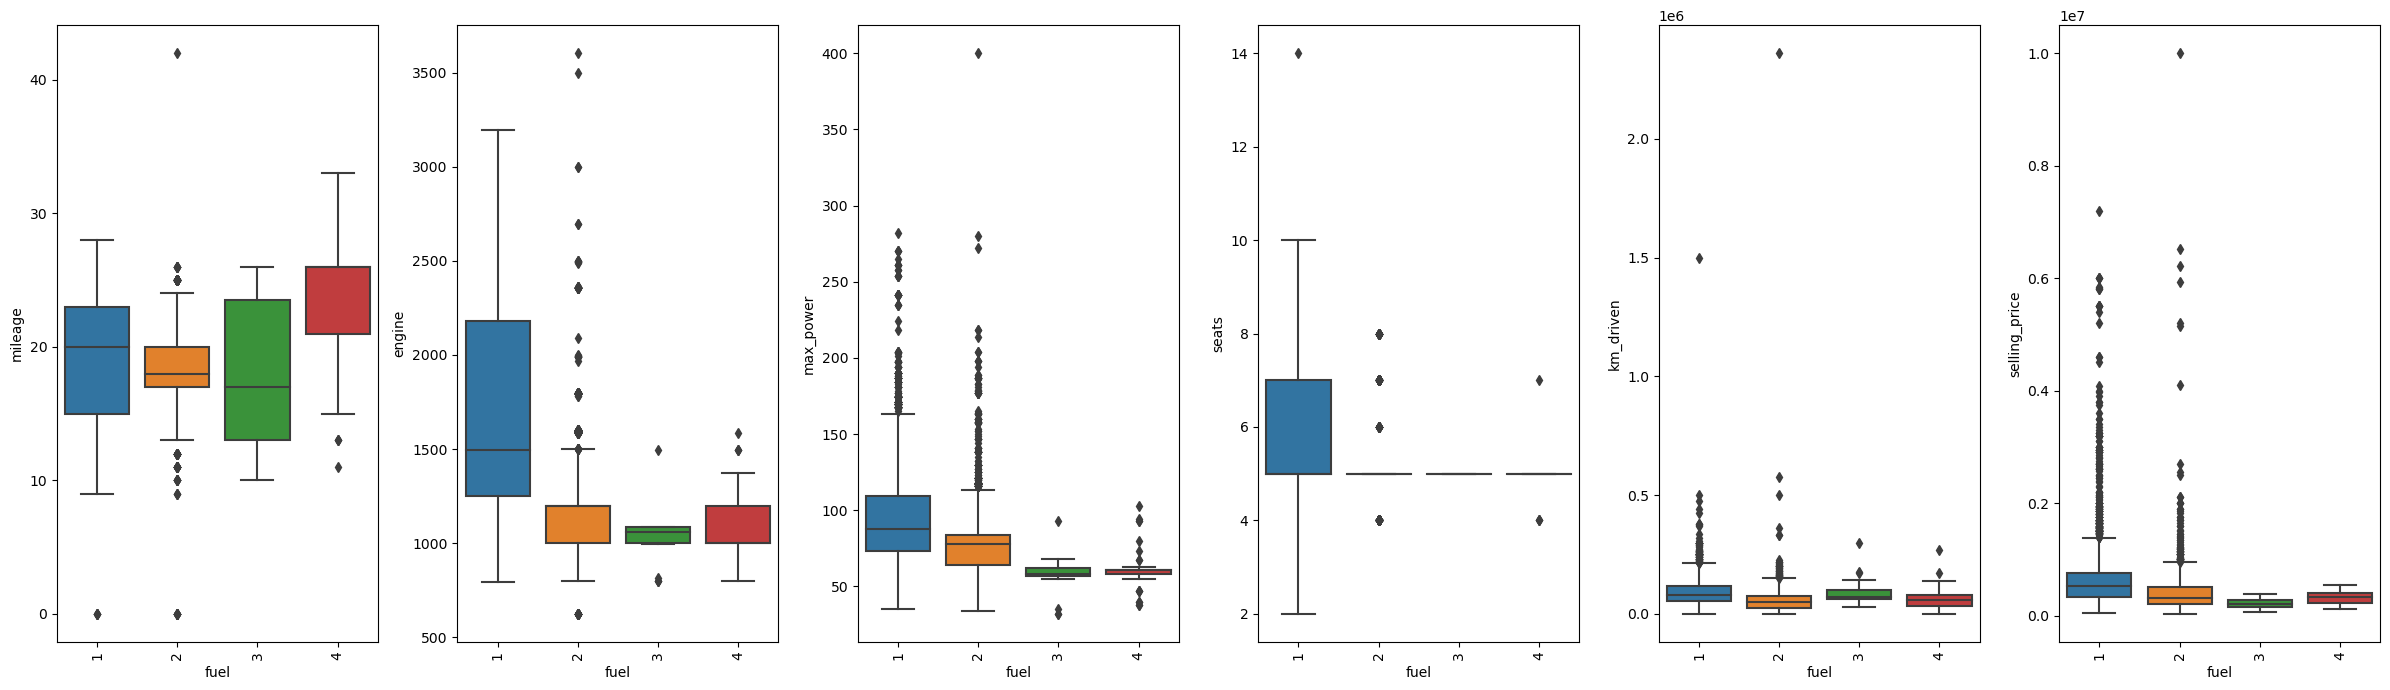

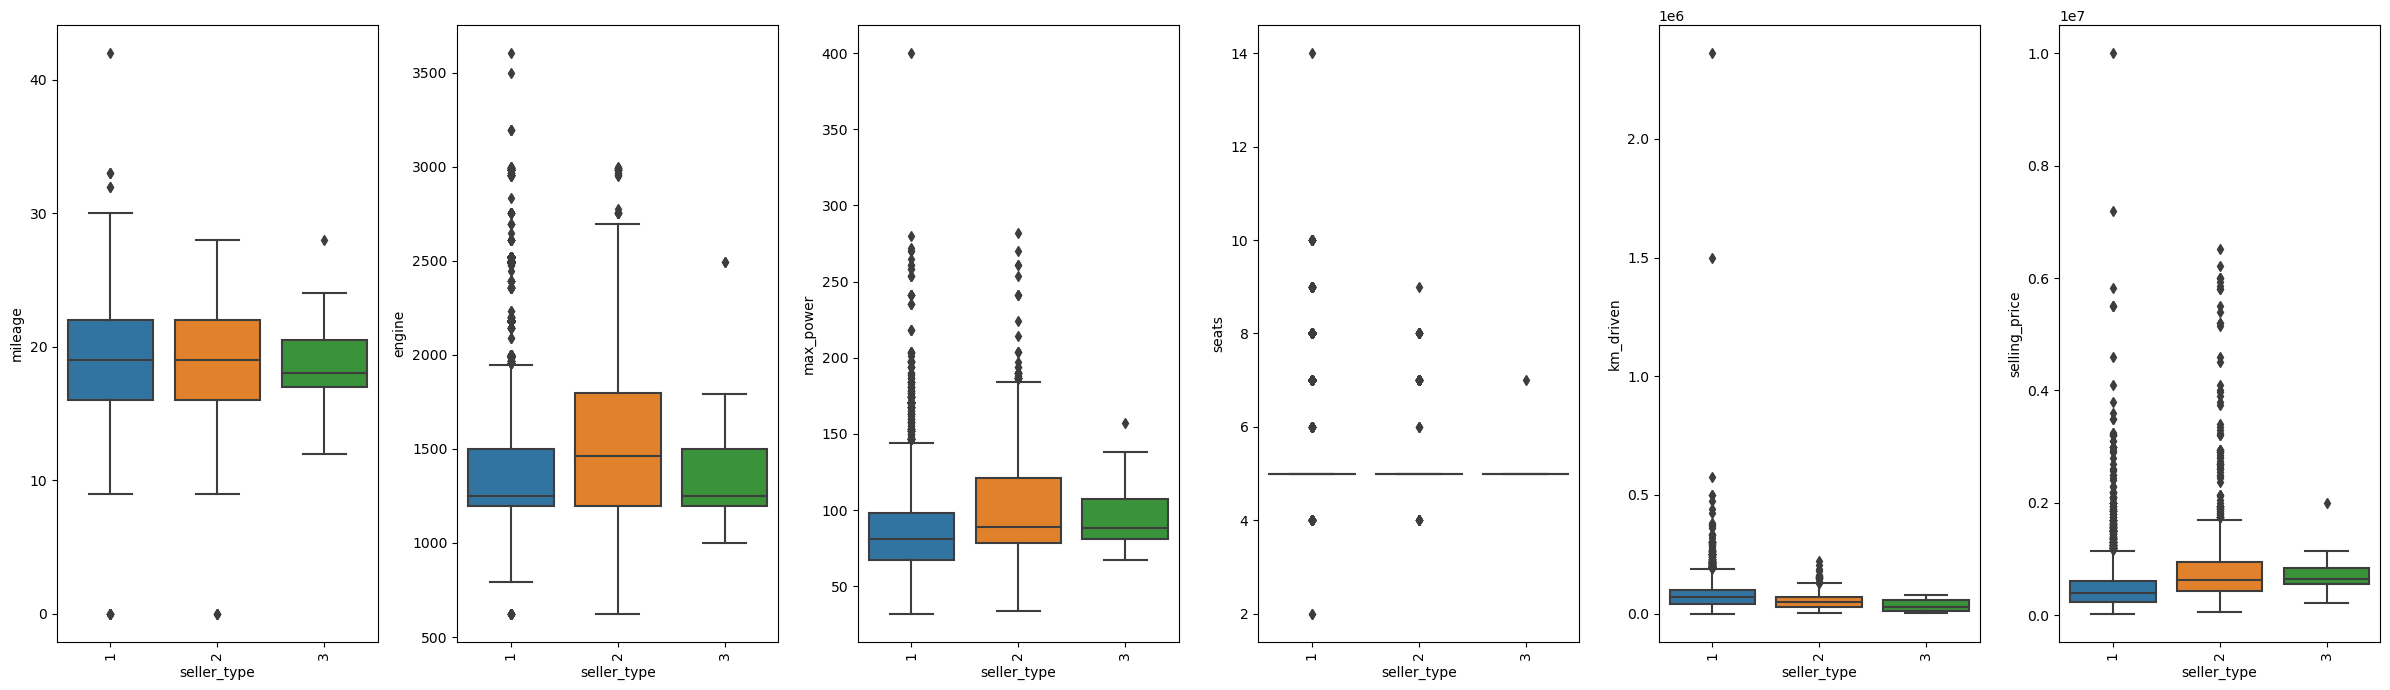

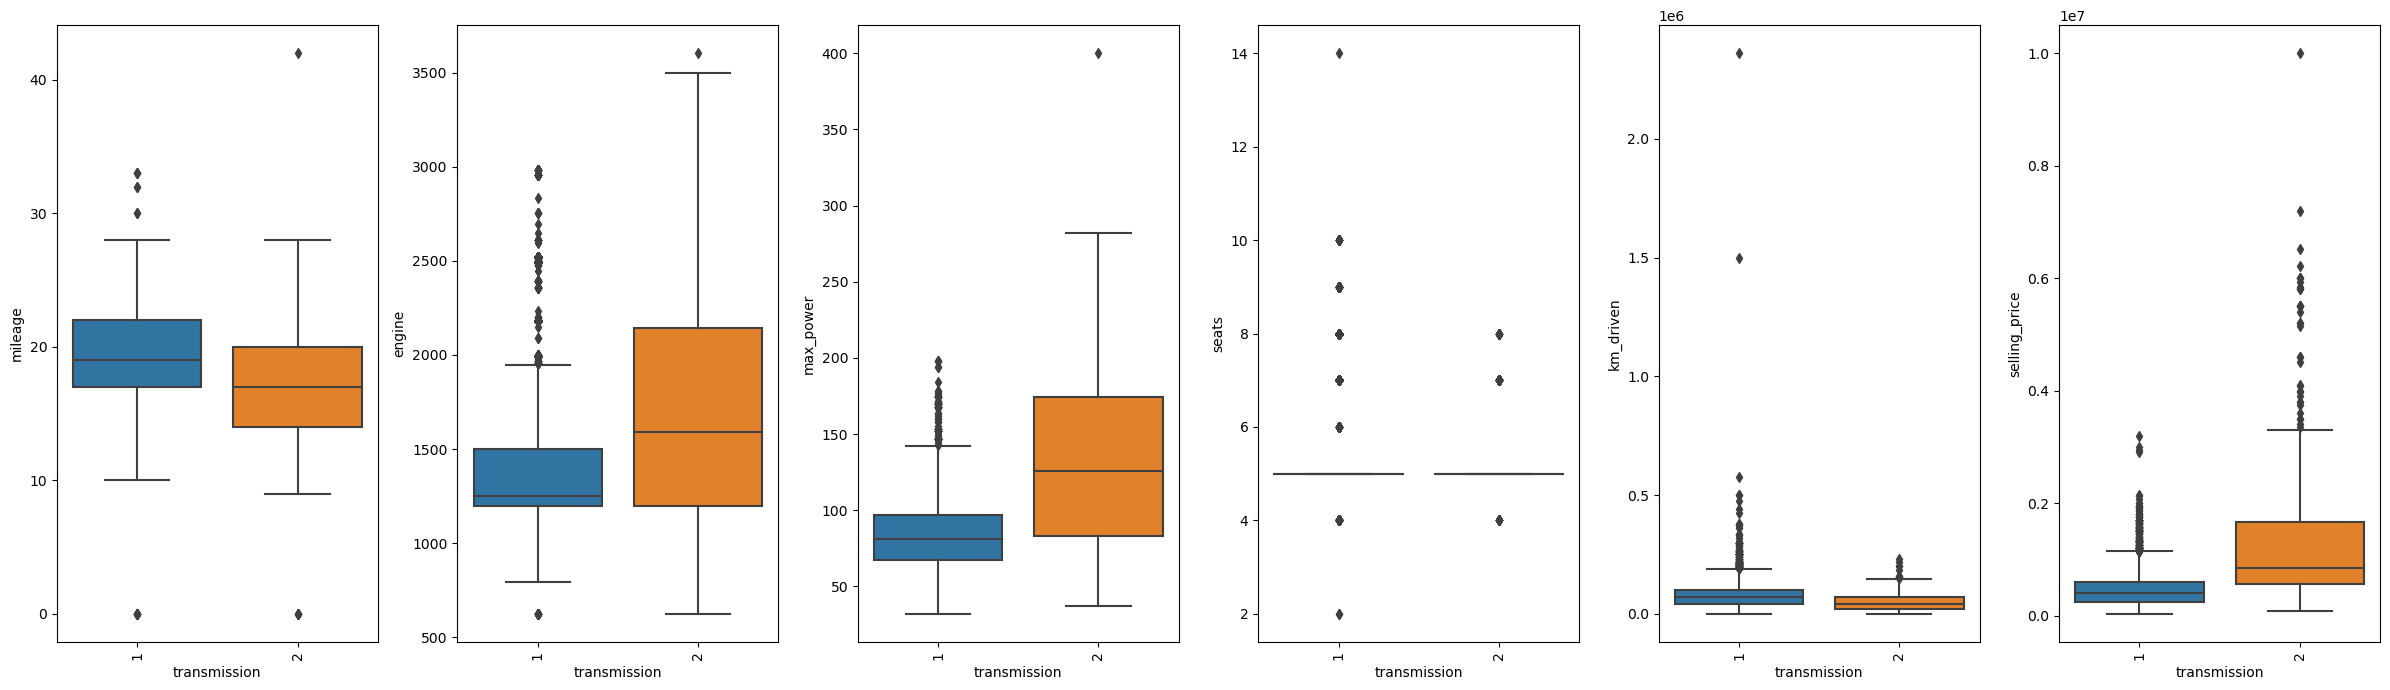

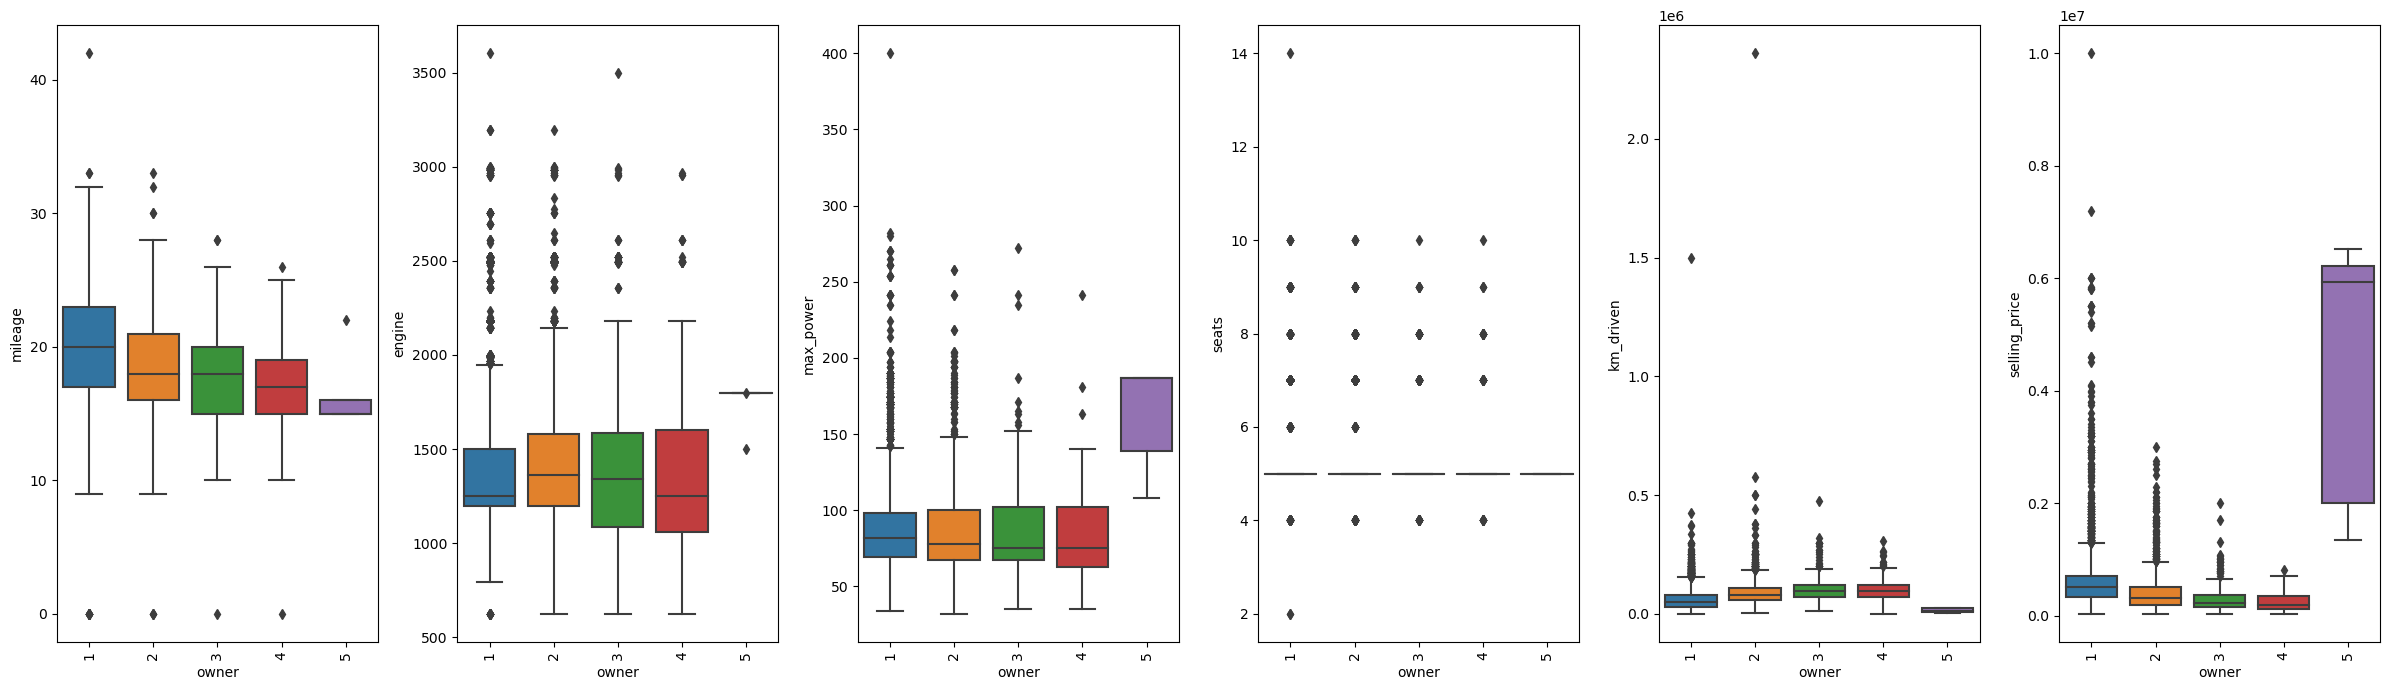

In [77]:
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24, 7))
    for j, k in enumerate(numericals):
        sns.boxplot(cars_data, y=k, x=i, ax=axes[j])
        axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

In [78]:
## different algorithms require diff type of scaling 


In [79]:
### data encoding
le = LabelEncoder()
for i in categoricals:
     cars_data[i] = le.fit_transform(cars_data[i])
     print(cars_data)

      name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0        1  2014         450000     145500     0            1             1   
1        2  2014         370000     120000     0            1             1   
2        3  2006         158000     140000     1            1             1   
3        4  2010         225000     127000     0            1             1   
4        1  2007         130000     120000     1            1             1   
...    ...   ...            ...        ...   ...          ...           ...   
6712     1  2013         260000      50000     1            1             1   
6713     4  2014         475000      80000     0            1             1   
6714     4  2013         320000     110000     1            1             1   
6715     4  2007         135000     119000     0            1             1   
6716     1  2009         382000     120000     0            1             1   

      owner  mileage  engine  max_power  seats  
0 

In [80]:
###This line imports the LabelEncoder class, which is used to convert categorical data into numeric data.

In [81]:
## what will be the diff with one hot encoding 

In [82]:
data = cars_data[categoricals+["year"]+numericals].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [106]:


x_train, x_test, y_train, y_test = train_test_split(input_data,output_data , test_size=0.2)

In [107]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    ans=model.predict(input_data_model)
    print("MSE: ", mse)
    print("r2: ", r2)
    print("ans; ", ans)
    return r2, mse

In [85]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
import xgboost as xgb

In [86]:
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
lnr = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor()
ridge = Ridge()
lasso = Lasso()
xgboost = xgb.XGBRegressor()

models = [rfr, etr, abr, gbr, lnr,svr,knn,ridge,lasso,xgboost]
names = ["Random Forest", "Extra Trees", "Ada Boost",
        "Gradient Boosting", "Linear Regression","SVR", "KNN", "Ridge", "Lasso", "XGBoost"]

In [108]:
import joblib
r2s, mses = [], []
for i, j in zip(models, names):
    print("*"*30, "\n", j)
    r2, mse = training(i)
    joblib.dump(i, f'{j}.pkl')
    r2s += [r2]
    mses += [mse]
    print("\n\n")

****************************** 
 Random Forest
MSE:  20166484651.473007
r2:  0.9236043336868862
ans;  [831339.98]



****************************** 
 Extra Trees
MSE:  19714806383.105816
r2:  0.9253154034577173
ans;  [1207299.98]



****************************** 
 Ada Boost
MSE:  109795142899.12833
r2:  0.5840686542704023
ans;  [1258098.53039832]



****************************** 
 Gradient Boosting
MSE:  18803731060.430645
r2:  0.9287667836828832
ans;  [1027329.11551644]



****************************** 
 Linear Regression
MSE:  100770313843.30078
r2:  0.6182569543632266
ans;  [1339120.52463894]



****************************** 
 SVR
MSE:  272405674162.51785
r2:  -0.03194053623016768
ans;  [420358.34641793]



****************************** 
 KNN
MSE:  123012745273.11679
r2:  0.5339970846401997
ans;  [1365000.]



****************************** 
 Ridge
MSE:  100782722331.90532
r2:  0.6182099479180645
ans;  [1338444.95736837]



****************************** 
 Lasso
MSE:  100770636

In [88]:
input_data_model = pd.DataFrame(
    [[5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [109]:
for name in names:
    # Load the trained model
    model = joblib.load(f'{name}.pkl')
    
    # Make predictions on the new input data
    prediction = model.predict(input_data_model)
   
    # Print the predictions
    print(f'Prediction using {name}: {prediction[0]}')
    print ("accuracy:",model.score(x_test,y_test))

Prediction using Random Forest: 831339.98
accuracy: 0.9236043336868862
Prediction using Extra Trees: 1207299.98
accuracy: 0.9253154034577173
Prediction using Ada Boost: 1258098.5303983227
accuracy: 0.5840686542704023
Prediction using Gradient Boosting: 1027329.1155164402
accuracy: 0.9287667836828832
Prediction using Linear Regression: 1339120.524638936
accuracy: 0.6182569543632266
Prediction using SVR: 420358.3464179324
accuracy: -0.03194053623016768
Prediction using KNN: 1365000.0
accuracy: 0.5339970846401997
Prediction using Ridge: 1338444.9573683739
accuracy: 0.6182099479180645
Prediction using Lasso: 1339104.3548189402
accuracy: 0.6182557301843239
Prediction using XGBoost: 870167.375
accuracy: 0.9360653758049011


In [90]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

In [98]:
model = RandomForestRegressor()

In [99]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

In [100]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [101]:
predict = model.predict(x_test)

In [102]:
predict

array([926943.33333333, 233644.98      , 713159.16666667, ...,
       296899.97      , 188457.66666667, 720187.33133333])

In [103]:
input_data_model = pd.DataFrame(
    [[5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [104]:
model.predict(input_data_model)

array([861230.])